In [123]:
#NAME: Christian Dominic Angus
#ID: 6197873

#CERTIFICATION: I understand FIU's academic policies, and I certify that this work is my
#                  own and that none of it is the work of any other person.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 1. Load the COP4612_HW1.csv data into a dataframe and show the first 10 entries of the data frame.

data = pd.read_csv('COP4612_HW1.csv')
data[0:10]

salary sex pay_grade          position  age  year_at_company
0   51945.03   M      GS10  FinancialAnalyst   49               19
1  120282.27   M      GS15        Accountant   20                0
2   73131.81   F      GS11  FinancialAnalyst   40               16
3   69548.85   M      GS11         Developer   32                4
4  114453.95   M      GS13        Accountant   57               21
5  100371.59   F      GS10         Secretary   64               40
6  108991.56   M      GS13         Developer   35               10
7   83882.52   M      GS11         Developer   37               12
8   76271.75   M      GS11         Developer   33                5
9  152449.05   M      GS15        Accountant   56               14

In [124]:
# 2. Print out the features (columns) name of the dataframe.

print(data.columns)

Index(['salary', 'sex', 'pay_grade', 'position', 'age', 'year_at_company'], dtype='object')


In [125]:
# 3. Print out the features (columns) dtype information.

print("--------------------\nFeature Info\n--------------------")
print(data.info())

--------------------
Feature Info
--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   salary           3000 non-null   float64
 1   sex              3000 non-null   object 
 2   pay_grade        3000 non-null   object 
 3   position         3000 non-null   object 
 4   age              3000 non-null   int64  
 5   year_at_company  3000 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 140.8+ KB
None


In [126]:
# 4. Print out the correlation of the features of the dataframe:

print(data.corr())

                   salary       age  year_at_company
salary           1.000000  0.052545         0.390425
age              0.052545  1.000000         0.665181
year_at_company  0.390425  0.665181         1.000000


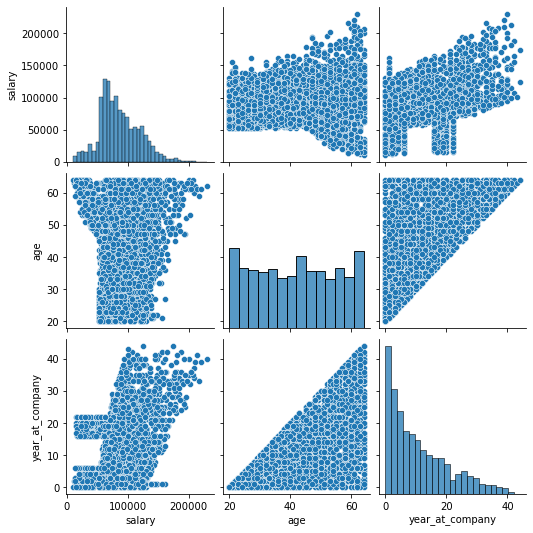

In [127]:
# 5. Show a pairwise plot of the feature of the dataframe. Here’s an example of what I’m looking for:

sns.pairplot(data)

In [128]:
# 6. Create dummy variables for features: sex, position, paygrade, then print out the column names 
# of the dataframe and show the first five entries of the dataframe.

new_data = pd.get_dummies(data)
print(new_data.columns)
pd.get_dummies(data[0:5])

Index(['salary', 'age', 'year_at_company', 'sex_F', 'sex_M', 'pay_grade_GS10',
       'pay_grade_GS11', 'pay_grade_GS12', 'pay_grade_GS13', 'pay_grade_GS14',
       'pay_grade_GS15', 'position_Accountant', 'position_Developer',
       'position_Engineer', 'position_FinancialAnalyst', 'position_Secretary'],
      dtype='object')


salary  age  year_at_company  sex_F  sex_M  pay_grade_GS10  \
0   51945.03   49               19      0      1               1   
1  120282.27   20                0      0      1               0   
2   73131.81   40               16      1      0               0   
3   69548.85   32                4      0      1               0   
4  114453.95   57               21      0      1               0   

   pay_grade_GS11  pay_grade_GS13  pay_grade_GS15  position_Accountant  \
0               0               0               0                    0   
1               0               0               1                    1   
2               1               0               0                    0   
3               1               0               0                    0   
4               0               1               0                    1   

   position_Developer  position_FinancialAnalyst  
0                   0                          1  
1                   0                          0  
2                   0                          1  
3                   1                          0  
4                   0                          0

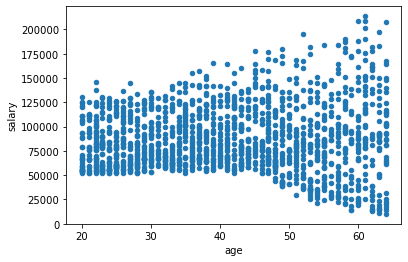

In [129]:
# 7. Plot the only women data with x-axis -> age and y-axis -> salary.

female_only = new_data[new_data['sex_F'] == 1]
female_only.plot(x = 'age', y = 'salary', kind = 'scatter')
plt.show()

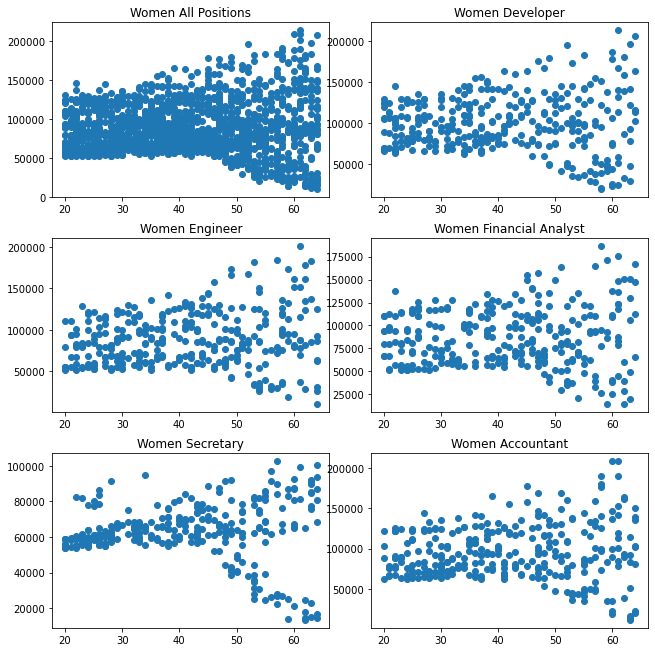

In [130]:
# 8. Subplot the only women data by position with x-axis -> age and y-axis -> salary. Write a 1-3 
# sentence comment about what you see in these graphs.

fig, ax = plt.subplots(3, 2, figsize = (9,9))
fig.tight_layout(h_pad = 2)

f_accountant = female_only[female_only['position_Accountant'] == 1]
f_developer = female_only[female_only['position_Developer'] == 1]
f_fa = female_only[female_only['position_FinancialAnalyst'] == 1]
f_engineer = female_only[female_only['position_Engineer'] == 1]
f_secretary = female_only[female_only['position_Secretary'] == 1]

ax[0][0].scatter(female_only['age'], female_only['salary'])
ax[0][0].set_title('Women All Positions')
ax[1][0].scatter(f_engineer['age'], f_engineer['salary'])
ax[1][0].set_title('Women Engineer')
ax[2][0].scatter(f_secretary['age'], f_secretary['salary'])
ax[2][0].set_title('Women Secretary')
ax[0][1].scatter(f_developer['age'], f_developer['salary'])
ax[0][1].set_title('Women Developer')
ax[1][1].scatter(f_fa['age'], f_fa['salary'])
ax[1][1].set_title('Women Financial Analyst')
ax[2][1].scatter(f_accountant['age'], f_accountant['salary'])
ax[2][1].set_title('Women Accountant')

plt.show()

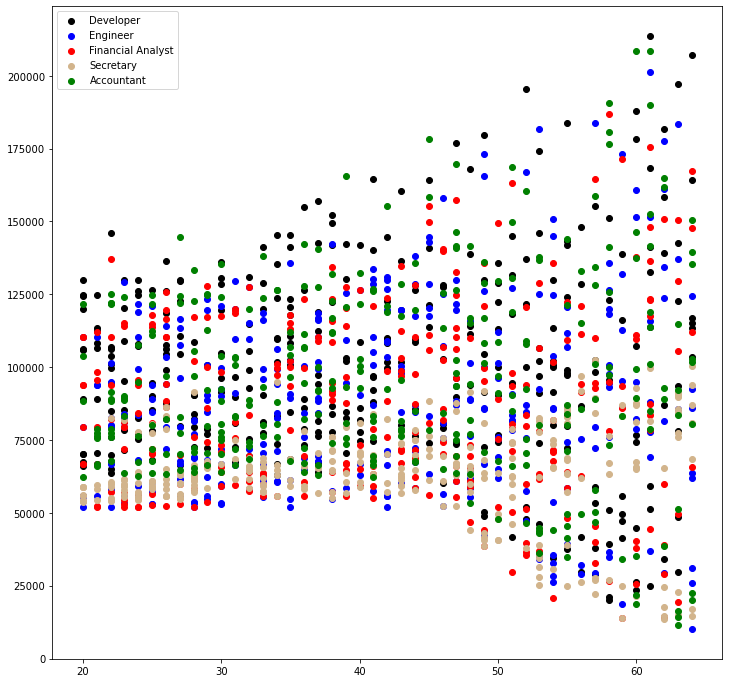

In [131]:
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(12)

plt.scatter(f_developer['age'], f_developer['salary'], color='black', label='Developer')
plt.scatter(f_engineer['age'], f_engineer['salary'], color='blue', label='Engineer')
plt.scatter(f_fa['age'], f_fa['salary'], color='red', label='Financial Analyst')
plt.scatter(f_secretary['age'], f_secretary['salary'], color='tan', label='Secretary')
plt.scatter(f_accountant['age'], f_accountant['salary'], color='green', label='Accountant')
plt.legend()

plt.show()

In [132]:
data_female = {'Position': ['All', 'Developer', 'Engineer', 'Financial Analyst', 'Secretary', 'Accountant'],
               'Count':[female_only.count()[0], f_developer.count()[0], f_engineer.count()[0], 
                f_fa.count()[0], f_secretary.count()[0], f_accountant.count()[0]], 'Min Salary': [
                   round(female_only['salary'].min(), 2), round(f_developer['salary'].min(), 2), 
                   round(f_engineer['salary'].min(), 2), round(f_fa['salary'].min(), 2), 
                   round(f_secretary['salary'].min(), 2), round(f_accountant['salary'].min(), 2)],
              'Max Salary': [round(female_only['salary'].max(), 2), round(f_developer['salary'].max(), 2),
                round(f_engineer['salary'].max(), 2), round(f_fa['salary'].max(), 2), round(f_secretary['salary'].max(), 2), 
                round(f_accountant['salary'].max(), 2)], 'Mean Salary': [round(female_only['salary'].mean(), 2), 
                round(f_developer['salary'].mean(), 2), round(f_engineer['salary'].mean(), 2), round(f_fa['salary'].mean(), 2), 
                round(f_secretary['salary'].mean(), 2), round(f_accountant['salary'].mean(), 2)], 'Std Dev Salary':
               [female_only['salary'].std(), f_developer['salary'].std(), f_engineer['salary'].std(), f_fa['salary'].std(), 
               f_secretary['salary'].std(), f_accountant['salary'].std()], 'Age': [female_only['age'].mean(), f_developer['age'].mean(), 
                f_engineer['age'].mean(), f_fa['age'].mean(), f_secretary['age'].mean(), f_accountant['age'].mean()]
              }

female_stat = pd.DataFrame(data_female)
female_stat

Position  Count  Min Salary  Max Salary  Mean Salary  \
0                All   1533    10086.06   213617.05     87549.99   
1          Developer    326    20152.53   213617.05    100963.27   
2           Engineer    329    10086.06   201232.58     88267.18   
3  Financial Analyst    287    13991.54   186865.19     87178.33   
4          Secretary    291    13411.31   102608.67     63296.36   
5         Accountant    300    11410.88   208665.88     96069.27   

   Std Dev Salary        Age  
0    33495.553131  41.417482  
1    34717.443804  41.052147  
2    32627.254524  41.145897  
3    32097.677493  41.519164  
4    16671.174510  41.512027  
5    34256.235823  41.923333

In [133]:
def remove_outliers(df,columns,n_std):
    for col in columns:
        print('Working on column: {}'.format(col))
        
        mean = df[col].mean()
        sd = df[col].std()
        
        df = df[(df[col] <= mean+(n_std*sd))]
        
    return df

Working on column: age
Working on column: salary


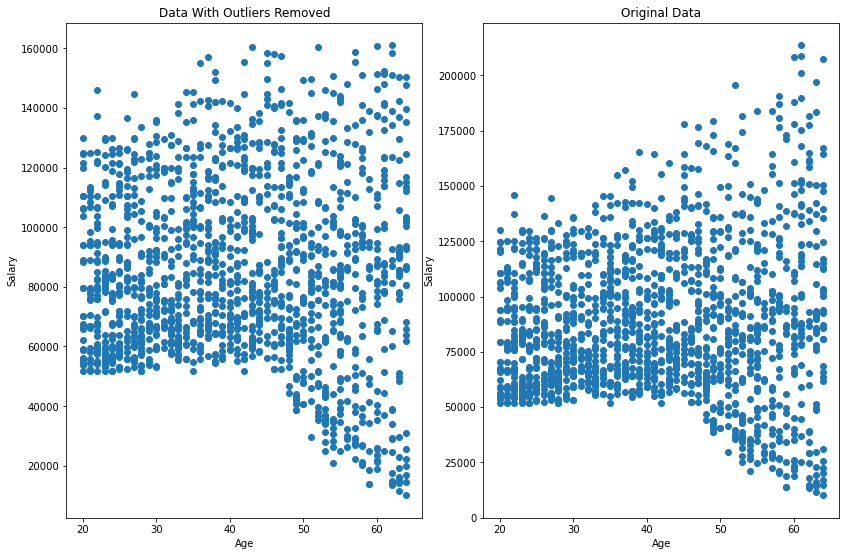

In [134]:
data3 = female_only.copy(deep=True)

columns = ['age', 'salary']

data3 = remove_outliers(data3, columns, 2.2)

fig, ax = plt.subplots(1, 2, figsize = (12, 8))
fig.tight_layout(pad = 3)

ax[0].set_xlabel('Age')
ax[0].set_ylabel('Salary')
ax[0].set_title('Data With Outliers Removed')

ax[0].scatter(data3['age'], data3['salary'])

ax[1].set_xlabel('Age')
ax[1].set_ylabel('Salary')
ax[1].set_title('Original Data')

ax[1].scatter(female_only['age'], female_only['salary'])

plt.show()

In [135]:
def training_automation(data_source):
    
    
    
    report_df = pd.DataFrame(columns=['Train', 
                                      'Test', 
                                      'Test_R_Score', 
                                      'Test_RMSE',
                                      'Train_R_Score', 
                                      'Train_RMSE',
                                      'Model_Var',
                                      'Model_Error',
                                      'Avg_Salary'  ])
    # df
    
    model = LinearRegression()

    # getting the dependent and independent variables
    x_data = data_source[['age']]
    y_data = data_source['salary']
    
    sizes = np.arange(0.2, 1.0, 0.2)

    for  size in sizes:
        x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, shuffle = True, train_size = size)


        # fit the model -> build the training model
        model.fit(x_train, y_train)


        predictions_test = model.predict(x_test) 


        # getting the error of the model
        error_test = y_test - predictions_test


        r2_test = r2_score(y_test, predictions_test)
        rmse_test = mean_squared_error(y_test, predictions_test, squared=True)


        # getting the trainset info
        predictions_train = model.predict(x_train)
        r2_train = r2_score(y_train, predictions_train)
        rmse_train = mean_squared_error(y_train, predictions_train, squared=True)

        # getting the error of the model
        error_train = y_train - predictions_train


        #normalizing by size
        model_variance = (rmse_test /  y_test.size) / (rmse_train /  y_train.size)
        
        error_mean = error_test.mean()
        avg_salary = round(model.intercept_, 2)
        
        # appending new to report dataframe
        report_df.loc[len(report_df.index)] = {'Train': size, 
                                              'Test': 1- size, 
                                              'Test_R_Score': r2_test, 
                                              'Test_RMSE': rmse_test,
                                              'Train_R_Score': r2_train, 
                                              'Train_RMSE': rmse_train,
                                              'Model_Var': model_variance,
                                              'Model_Error': error_mean,
                                              'Avg_Salary':avg_salary}
        

    return report_df

In [136]:
report_all = training_automation(female_only)
report_all

Train  Test  Test_R_Score     Test_RMSE  Train_R_Score    Train_RMSE  \
0    0.2   0.8      0.003087  1.064416e+09       0.004028  1.330259e+09   
1    0.4   0.6      0.002396  1.093561e+09       0.003466  1.153993e+09   
2    0.6   0.4     -0.005920  1.180103e+09       0.004772  1.077935e+09   
3    0.8   0.2      0.003319  1.121512e+09       0.002721  1.116464e+09   

   Model_Var  Model_Error  Avg_Salary  
0   0.199550  -364.962761    80392.17  
1   0.631411  1123.399386    80496.73  
2   1.638606  3055.781121    79065.11  
3   4.011539 -1895.375674    82384.31

In [137]:
report_developer = training_automation(f_developer)
report_developer

Train  Test  Test_R_Score     Test_RMSE  Train_R_Score    Train_RMSE  \
0    0.2   0.8     -0.015593  1.176474e+09       0.008056  1.357738e+09   
1    0.4   0.6     -0.000033  1.309319e+09       0.000014  1.039057e+09   
2    0.6   0.4     -0.004405  1.397047e+09       0.000589  1.073601e+09   
3    0.8   0.2     -0.045639  1.300690e+09       0.000221  1.180340e+09   

   Model_Var  Model_Error  Avg_Salary  
0   0.215794 -2324.468489    91751.83  
1   0.835783   550.684353   100244.63  
2   1.937008   923.550900   103090.62  
3   4.341064  7165.632791   101078.60

In [138]:
report_engineer = training_automation(f_engineer)
report_engineer

Train  Test  Test_R_Score     Test_RMSE  Train_R_Score    Train_RMSE  \
0    0.2   0.8     -0.003012  1.058909e+09       0.000096  1.078398e+09   
1    0.4   0.6      0.015275  1.065150e+09       0.023395  1.000931e+09   
2    0.6   0.4     -0.015786  8.658246e+08       0.037646  1.156074e+09   
3    0.8   0.2      0.055569  8.562576e+08       0.010113  1.086796e+09   

   Model_Var  Model_Error  Avg_Salary  
0   0.241762  2622.619809    85145.82  
1   0.704065  2498.543281    70324.47  
2   1.117729   745.921171    67202.36  
3   3.139556  3681.522516    76967.04

In [139]:
report_fa = training_automation(f_fa)
report_fa

Train  Test  Test_R_Score     Test_RMSE  Train_R_Score    Train_RMSE  \
0    0.2   0.8     -0.008696  1.106707e+09       0.001740  7.389581e+08   
1    0.4   0.6     -0.048851  1.059479e+09       0.000148  1.023459e+09   
2    0.6   0.4     -0.001353  1.151294e+09       0.000062  9.428444e+08   
3    0.8   0.2      0.006742  8.067416e+08       0.001418  1.078488e+09   

   Model_Var  Model_Error  Avg_Salary  
0   0.371159 -1604.076693    91934.57  
1   0.682151  6810.015525    84315.99  
2   1.826321  1982.102245    85558.10  
3   2.953429 -2116.778679    83638.46

In [140]:
report_secretary = training_automation(f_secretary)
report_secretary

Train  Test  Test_R_Score     Test_RMSE  Train_R_Score    Train_RMSE  \
0    0.2   0.8     -0.005828  2.808564e+08       0.000250  2.666179e+08   
1    0.4   0.6     -0.000307  2.859962e+08       0.000061  2.634586e+08   
2    0.6   0.4     -0.000150  3.276591e+08       0.000057  2.429026e+08   
3    0.8   0.2     -0.005504  1.901807e+08       0.000261  2.991808e+08   

   Model_Var  Model_Error  Avg_Salary  
0   0.262221  1222.227504    63119.82  
1   0.719561   187.445810    63574.76  
2   2.006104  -137.851970    62978.02  
3   2.499590   491.696396    64051.62

In [141]:
report_accountant = training_automation(f_accountant)
report_accountant

Train  Test  Test_R_Score     Test_RMSE  Train_R_Score    Train_RMSE  \
0    0.2   0.8     -0.004376  1.299457e+09       0.012339  6.544892e+08   
1    0.4   0.6     -0.000381  1.151281e+09       0.007276  1.186058e+09   
2    0.6   0.4     -0.004689  1.289385e+09       0.000025  1.092168e+09   
3    0.8   0.2     -0.011239  1.027792e+09       0.008162  1.197751e+09   

   Model_Var  Model_Error  Avg_Salary  
0   0.496363  3306.912400    84340.57  
1   0.647119 -2197.434750    88360.10  
2   1.770860  1962.730303    95822.76  
3   3.432408   521.255810    85912.94

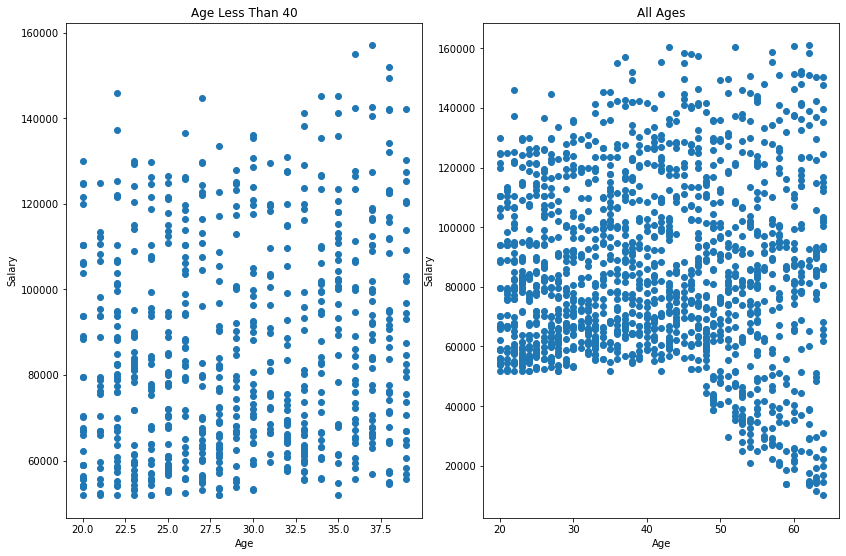

In [142]:
data_under40 = data3.copy(deep=True)

columns = ['age', 'salary']

data_under40 = data_under40[data_under40['age'] < 40]

fig, ax = plt.subplots(1, 2, figsize = (12, 8))
fig.tight_layout(pad = 3)

ax[0].set_xlabel('Age')
ax[0].set_ylabel('Salary')
ax[0].set_title('Age Less Than 40')

ax[0].scatter(data_under40['age'], data_under40['salary'])

ax[1].set_xlabel('Age')
ax[1].set_ylabel('Salary')
ax[1].set_title('All Ages')

ax[1].scatter(data3['age'], data3['salary'])

plt.show()

In [143]:
report_under40 = training_automation(data_under40)
report_under40

Train  Test  Test_R_Score     Test_RMSE  Train_R_Score    Train_RMSE  \
0    0.2   0.8      0.018905  6.113186e+08       0.024189  5.816559e+08   
1    0.4   0.6      0.015180  5.861453e+08       0.016472  6.368520e+08   
2    0.6   0.4      0.028222  5.850124e+08       0.019195  6.164318e+08   
3    0.8   0.2      0.024645  6.608812e+08       0.017853  5.901434e+08   

   Model_Var  Model_Error  Avg_Salary  
0   0.260886 -1618.515327    68121.60  
1   0.611410 -2540.549721    70951.03  
2   1.420180  -404.724967    68196.36  
3   4.471520  2743.114941    68664.00